#About Dataset

Content
This data was collected from https://www.bmkg.go.id/ . It contains rainfall data, the variable you can see below:

1.  Stasiun: Weather Station
2.  Tanggal : Date
3.  Tn: Minimum temperature (° C)
4.  Tx: Maximum temperature (° C)
5.  Tavg: Average temperature (° C)
6.  RR: Rainfall (mm)
7.  Hari_Hujan: Ground truth rainy today
8.  Besok_Hujan: Ground truth tomorrow weather forecast

This data can be used rainfall detection and/or forecast weather

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Mini Project/Copy of Dataset20_Weather_Prediction.csv')

In [ ]:
df

,Stasiun,Tanggal,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,Stasiun Meteorologi Nangapinoh,20-03-2010,20.3,31.1,25.8,108.0,1,1
1,Stasiun Meteorologi Maritim Tanjung Mas,07-03-2010,25.0,31.8,29.2,106.0,1,1
2,Stasiun Klimatologi Mempawah,09-01-2009,23.4,29.6,25.8,100.6,1,1
3,Stasiun Meteorologi Cilacap,09-01-2009,23.6,28.0,25.6,93.9,1,1
4,Stasiun Klimatologi Bogor,21-01-2009,21.1,29.4,25.5,93.0,1,1
...,...,...,...,...,...,...,...,...
918,Stasiun Klimatologi Bogor,09-03-2009,22.4,32.5,25.9,0.0,0,0
919,Stasiun Klimatologi Bogor,18-03-2009,21.2,33.0,26.6,0.0,0,0
920,Stasiun Klimatologi Bogor,19-03-2009,21.3,31.8,25.2,0.0,0,0
921,Stasiun Klimatologi Bogor,21-03-2009,21.6,32.4,26.1,0.0,0,0


#Data Transformation and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stasiun      923 non-null    object 
 1   Tanggal      923 non-null    object 
 2   Tn           923 non-null    float64
 3   Tx           923 non-null    float64
 4   Tavg         923 non-null    float64
 5   RR           923 non-null    float64
 6   Hari_hujan   923 non-null    int64  
 7   Besok_hujan  923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [ ]:
df.isna().sum()

Stasiun        0
Tanggal        0
Tn             0
Tx             0
Tavg           0
RR             0
Hari_hujan     0
Besok_hujan    0
dtype: int64

In [ ]:
df.Stasiun.unique()

array(['Stasiun Meteorologi Nangapinoh',
       'Stasiun Meteorologi Maritim Tanjung Mas',
       'Stasiun Klimatologi Mempawah', 'Stasiun Meteorologi Cilacap',
       'Stasiun Klimatologi Bogor',
       ' Stasiun Meteorologi Maritim Tanjung Mas',
       ' Stasiun Meteorologi Nangapinoh', ' Stasiun Klimatologi Bogor'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Stasiun      923 non-null    object        
 1   Tanggal      923 non-null    datetime64[ns]
 2   Tn           923 non-null    float64       
 3   Tx           923 non-null    float64       
 4   Tavg         923 non-null    float64       
 5   RR           923 non-null    float64       
 6   Hari_hujan   923 non-null    int64         
 7   Besok_hujan  923 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 57.8+ KB


In [ ]:
df.isnull().sum()

Stasiun        0
Tanggal        0
Tn             0
Tx             0
Tavg           0
RR             0
Hari_hujan     0
Besok_hujan    0
dtype: int64

In [ ]:
df.duplicated().sum()

50

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(873, 8)

In [ ]:
Bulan =df.groupby([df['Tanggal'].dt.year,df['Tanggal'].dt.month_name()],)['Stasiun'].sum().to_frame('Total amount')
Bulan = pd.DataFrame(Bulan)
Bulan

Total amount
Tanggal Tanggal                                                     
2009    April      Stasiun Klimatologi BogorStasiun Meteorologi M...
        August     Stasiun Meteorologi Maritim Tanjung MasStasiun...
        December   Stasiun Meteorologi Maritim Tanjung MasStasiun...
        February   Stasiun Meteorologi NangapinohStasiun Meteorol...
        January    Stasiun Klimatologi BogorStasiun Meteorologi M...
        July       Stasiun Klimatologi BogorStasiun Meteorologi M...
        June       Stasiun Meteorologi Maritim Tanjung MasStasiun...
        March      Stasiun Meteorologi Nangapinoh Stasiun Klimato...
        May        Stasiun Meteorologi Maritim Tanjung MasStasiun...
        November   Stasiun Klimatologi MempawahStasiun Klimatolog...
        October    Stasiun Klimatologi BogorStasiun Meteorologi N...
        September  Stasiun Klimatologi MempawahStasiun Meteorolog...
2010    April      Stasiun Klimatologi BogorStasiun Klimatologi M...
        August     Stasiun Klimatologi BogorStasiun Meteorologi C...
        December   Stasiun Meteorologi Maritim Tanjung MasStasiun...
        February   Stasiun Klimatologi MempawahStasiun Meteorolog...
        January    Stasiun Meteorologi Maritim Tanjung MasStasiun...
        July       Stasiun Meteorologi Maritim Tanjung MasStasiun...
        June       Stasiun Meteorologi Maritim Tanjung MasStasiun...
        March      Stasiun Meteorologi Nangapinoh Stasiun Meteoro...
        May        Stasiun Meteorologi NangapinohStasiun Meteorol...
        November   Stasiun Klimatologi Bogor Stasiun Meteorologi ...
        October    Stasiun Klimatologi BogorStasiun Meteorologi C...
        September  Stasiun Klimatologi Bogor Stasiun Meteorologi ...

#Descriptive Data Analysis

In [ ]:
df.describe()

,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,23.795418,31.216151,26.804926,10.440779,0.255441,0.255441
std,1.263188,1.568491,1.189561,16.884866,0.436359,0.436359
min,19.800000,24.700000,23.100000,0.000000,0.000000,0.000000
25%,23.000000,30.400000,26.000000,0.000000,0.000000,0.000000
50%,23.900000,31.400000,26.900000,3.000000,0.000000,0.000000
75%,24.800000,32.200000,27.600000,11.400000,1.000000,1.000000
max,26.700000,35.200000,29.800000,108.000000,1.000000,1.000000


#Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


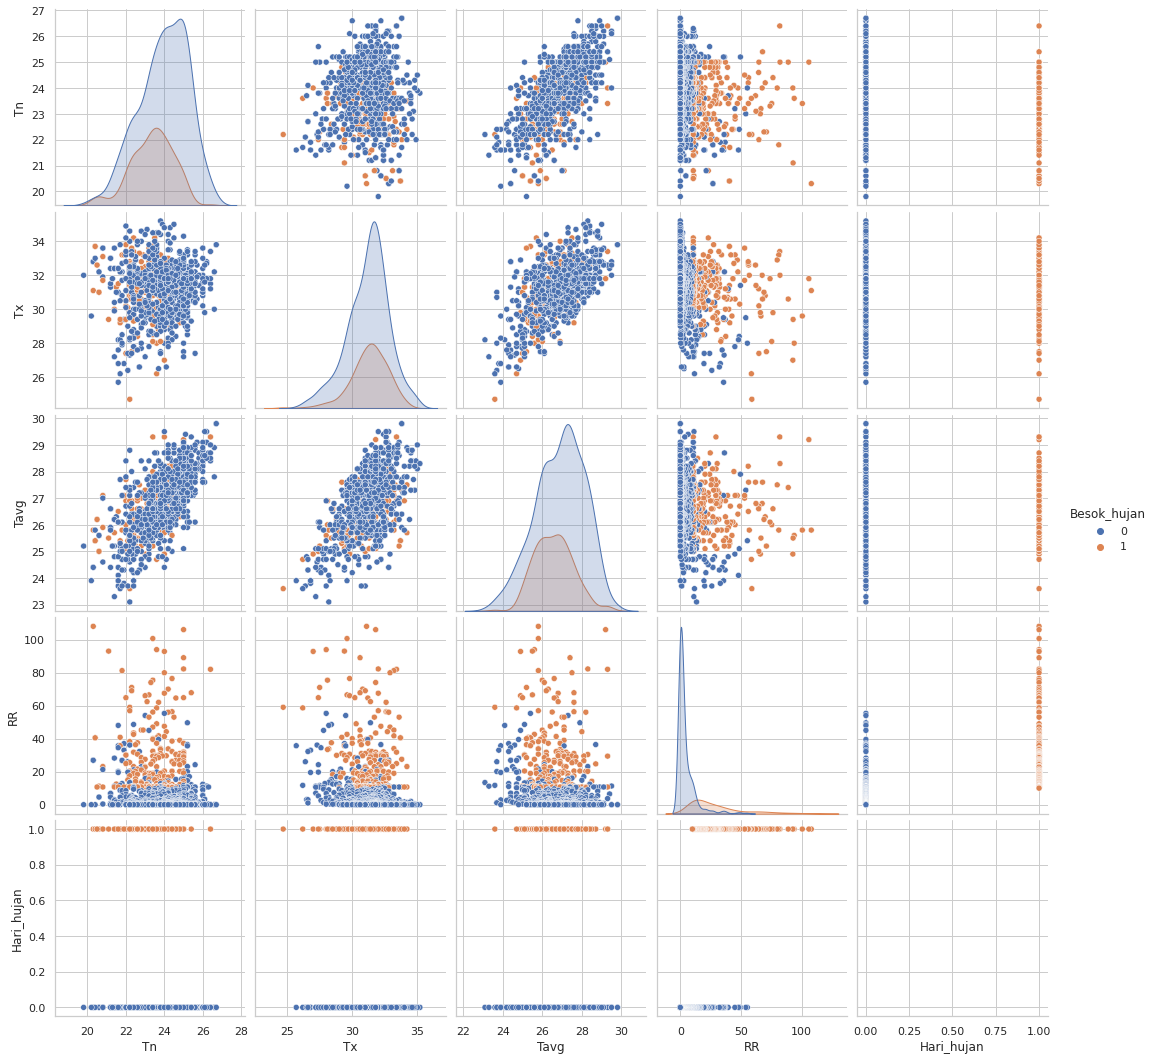

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.pairplot(df, hue="Besok_hujan", size=3)
plt.show()

The graph shows the relationship of several factors that have the most influence on the possibility of rain tomorrow or not. For variables Tn, Tx, and Tavg, the greater the value, the higher the probability for rain.

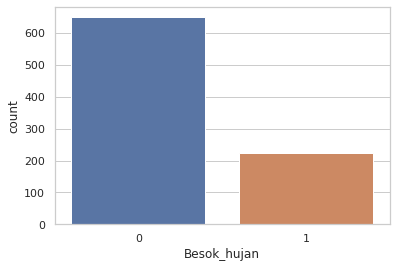

In [ ]:
sns.countplot(df['Besok_hujan'])

In [ ]:
df.Besok_hujan.value_counts()

0    650
1    223
Name: Besok_hujan, dtype: int64

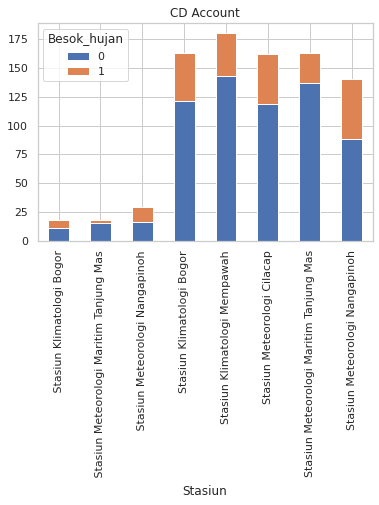

In [ ]:
pd.crosstab(df['Stasiun'],df['Besok_hujan']).plot(kind='bar',stacked=True,title='CD Account')

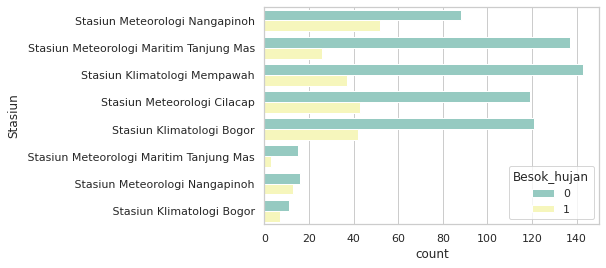

In [ ]:
plt.subplot()
sns.countplot(y = 'Stasiun', hue = 'Besok_hujan', data = df, palette = 'Set3')

In [ ]:
df.corr()

,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
Tn,1.000000,0.050776,0.682789,-0.163615,-0.202597,-0.202597
Tx,0.050776,1.000000,0.559813,-0.173325,0.031330,0.031330
Tavg,0.682789,0.559813,1.000000,-0.210898,-0.112228,-0.112228
RR,-0.163615,-0.173325,-0.210898,1.000000,0.641891,0.641891
Hari_hujan,-0.202597,0.031330,-0.112228,0.641891,1.000000,1.000000
Besok_hujan,-0.202597,0.031330,-0.112228,0.641891,1.000000,1.000000


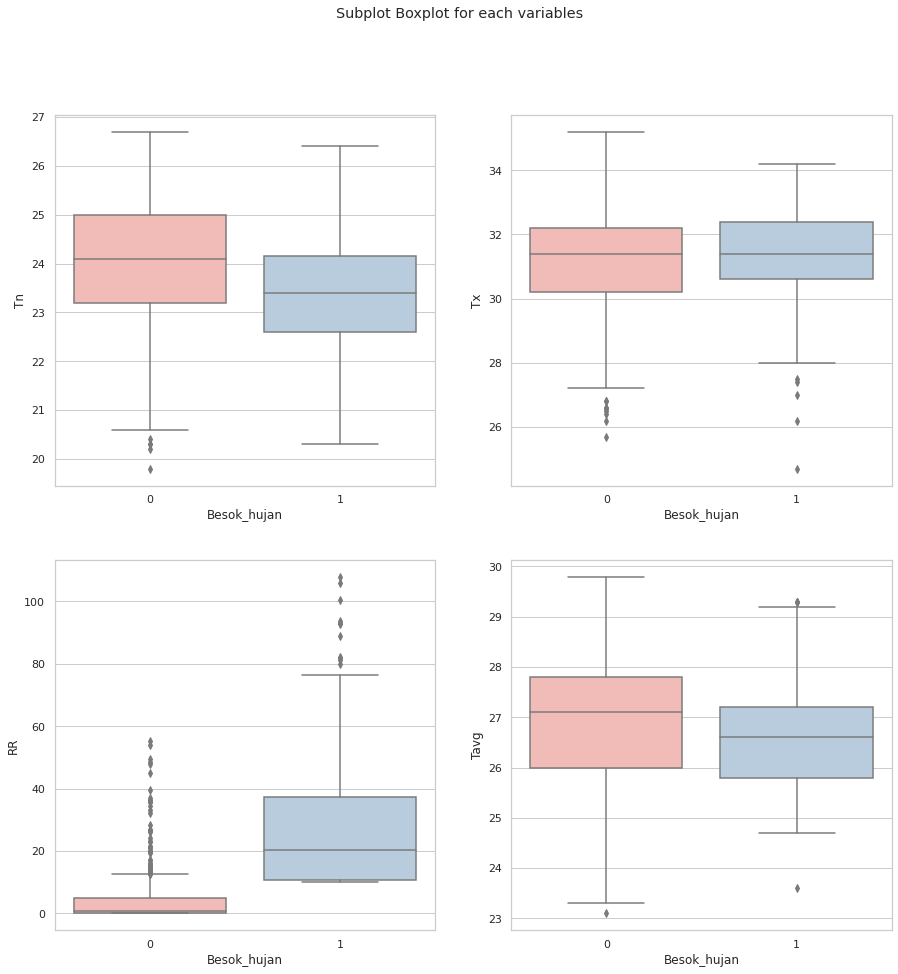

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Subplot Boxplot for each variables')

sns.boxplot(ax=axes[0, 0], data=df, x='Besok_hujan', y='Tn', palette="Pastel1")
sns.boxplot(ax=axes[0, 1], data=df, x='Besok_hujan', y='Tx', palette="Pastel1")
sns.boxplot(ax=axes[1, 0], data=df, x='Besok_hujan', y='RR', palette="Pastel1")
sns.boxplot(ax=axes[1, 1], data=df, x='Besok_hujan', y='Tavg', palette="Pastel1")

In [ ]:
for x in ['Tn']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
for x in ['Tx']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
for x in ['Tavg']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
for x in ['RR']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

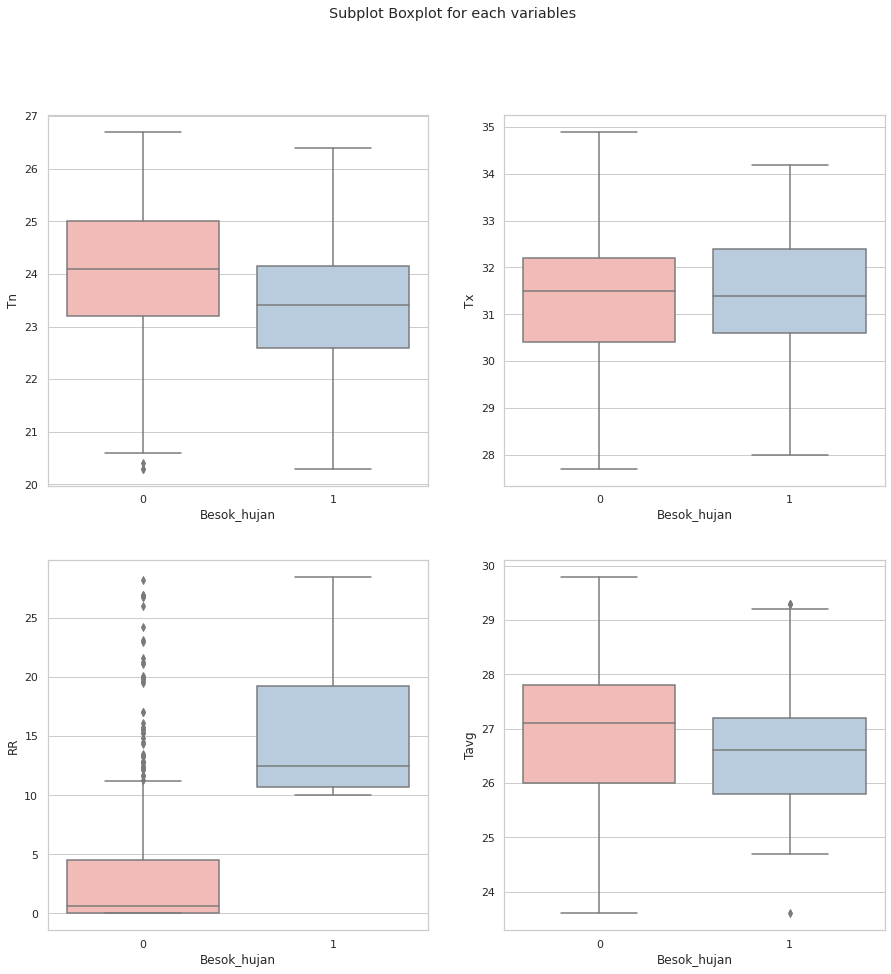

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Subplot Boxplot for each variables')

sns.boxplot(ax=axes[0, 0], data=df, x='Besok_hujan', y='Tn', palette="Pastel1")
sns.boxplot(ax=axes[0, 1], data=df, x='Besok_hujan', y='Tx', palette="Pastel1")
sns.boxplot(ax=axes[1, 0], data=df, x='Besok_hujan', y='RR', palette="Pastel1")
sns.boxplot(ax=axes[1, 1], data=df, x='Besok_hujan', y='Tavg', palette="Pastel1")

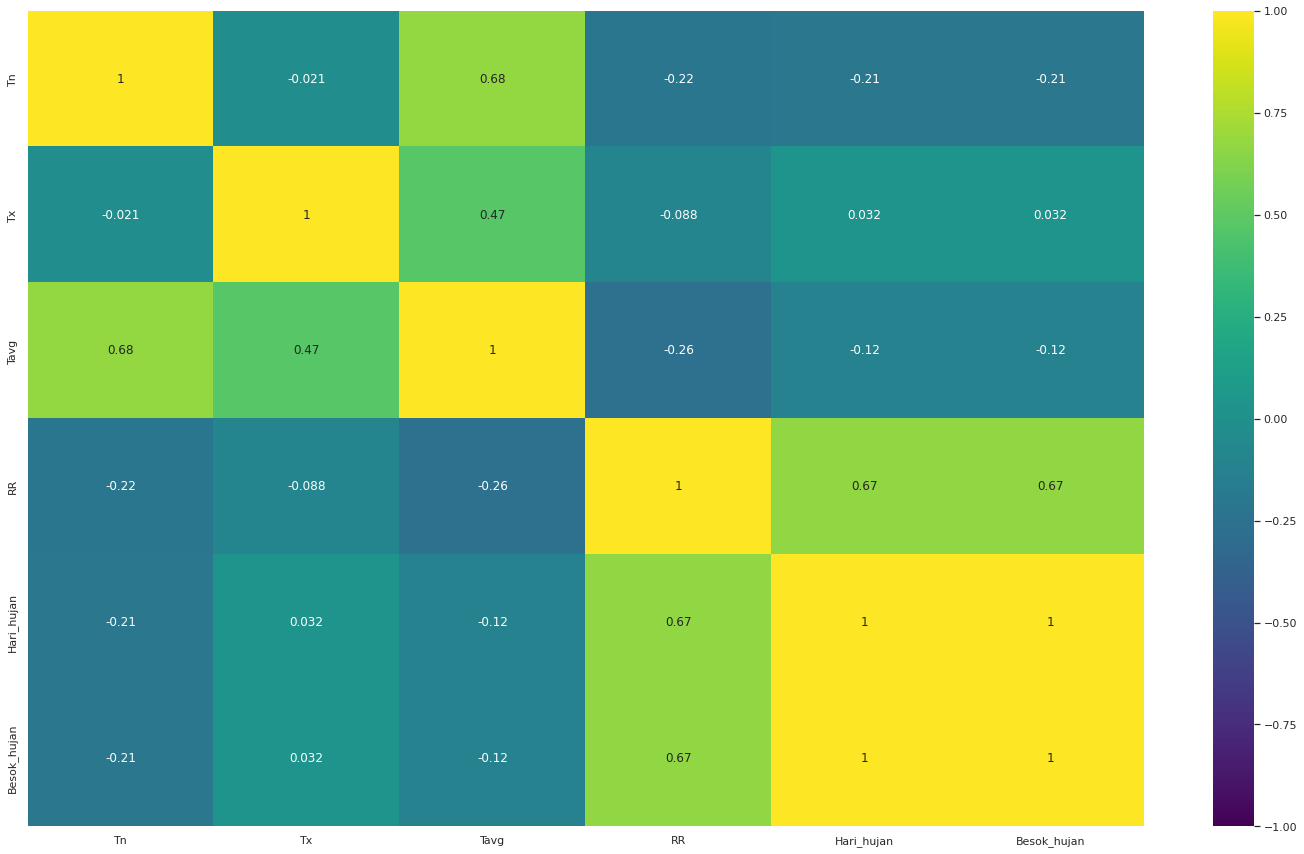

In [ ]:
plt.figure(figsize= (25,15))

sns.heatmap(df.corr(),vmin = -1, vmax = 1, cmap = 'viridis',annot = True)

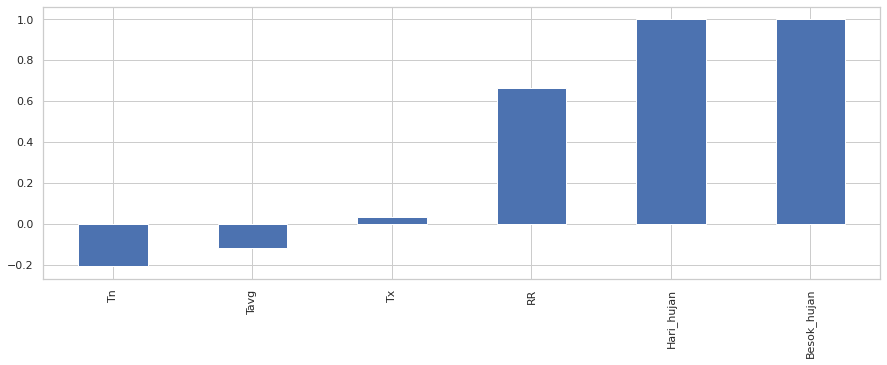

In [ ]:
plt.figure(figsize=(15,5))
df.corr()["Besok_hujan"].sort_values().plot(kind="bar")

variables that are positively correlated with the possibility of Besok_hujan are Tx, RR, and Hari_hujan. Meanwhile, Tn and Tavg are negatively correlated with Besok_hujan. So the tn, tavg, and Besok_hujan column will be dropped.

In [ ]:
#drop column 'Tn','RR', 'Tavg'
df = df.dropna(subset = ['Tn','RR', 'Tavg'])

In [ ]:
#column Hari_hujan will be dropped because have multicolinearitas with Besok_hujan
df1 = df.drop(columns = (['Stasiun','Tanggal','Hari_hujan']))

In [ ]:
df1

,Tn,Tx,Tavg,RR,Besok_hujan
104,23.7,30.2,26.1,28.5,1
105,22.8,29.6,25.2,28.5,1
106,21.4,30.4,24.8,28.2,0
107,23.5,33.8,27.3,27.5,1
108,23.0,31.3,25.6,27.5,1
...,...,...,...,...,...
918,22.4,32.5,25.9,0.0,0
919,21.2,33.0,26.6,0.0,0
920,21.3,31.8,25.2,0.0,0
921,21.6,32.4,26.1,0.0,0


In [ ]:
from collections import Counter

In [ ]:
Counter(df1['Besok_hujan'])

Counter({0: 613, 1: 137})

In [ ]:
X = df1.drop(columns = ["Besok_hujan"])
y = df1["Besok_hujan"]

In [ ]:
X_scale = X[['Tx',  'Tn', 'Tavg', 'RR']]

In [ ]:
X_scale.head(3)

,Tx,Tn,Tavg,RR
104,30.2,23.7,26.1,28.5
105,29.6,22.8,25.2,28.5
106,30.4,21.4,24.8,28.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE

In [ ]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X_scale)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, index=X_scale.index, columns=X_scale.columns)
X_scaled_df.head(3)

,Tx,Tn,Tavg,RR
104,-0.873753,-0.136881,-0.736837,3.349378
105,-1.319596,-0.860978,-1.544378,3.349378
106,-0.725139,-1.987352,-1.903285,3.306106


In [ ]:
Xs = X.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
print(Counter(y_train))

Counter({0: 490, 1: 110})


In [ ]:
oversample = SMOTE(random_state = 1)
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
print(Counter(y_train))

Counter({0: 490, 1: 490})


#**REGRESSION**

##RANDOM FOREST

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train,y_train)


#model.feature_importances_

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,rf_pred)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.89      0.93      0.91        27

    accuracy                           0.97       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
print(roc_auc_score(y_test, rf_pred))

0.9507678410117435


In [ ]:
rf_error = mae(y_test, rf_pred)
rf_error

0.03333333333333333

## Support Vector Machine

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[104  19]
 [  0  27]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       123
           1       0.59      1.00      0.74        27

    accuracy                           0.87       150
   macro avg       0.79      0.92      0.83       150
weighted avg       0.93      0.87      0.88       150



In [ ]:
print(roc_auc_score(y_test, svc_pred))

0.9227642276422764


**MAE**

In [ ]:
SVM_error=mae(y_test, svc_pred)
SVM_error

0.12666666666666668

In [ ]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[104  19]
 [  0  27]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       123
           1       0.59      1.00      0.74        27

    accuracy                           0.87       150
   macro avg       0.79      0.92      0.83       150
weighted avg       0.93      0.87      0.88       150



##Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[110  13]
 [  0  27]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       123
           1       0.68      1.00      0.81        27

    accuracy                           0.91       150
   macro avg       0.84      0.95      0.88       150
weighted avg       0.94      0.91      0.92       150



In [ ]:
print(roc_auc_score(y_test, y_pred))

0.9471544715447154


**MAE**

In [ ]:
LR_error = mae(y_test, y_pred)
LR_error

0.08666666666666667

##Decision Tree

In [ ]:
model_tree = DecisionTreeClassifier(random_state = 111)
fit_tree = model_tree.fit(X_train,y_train)

In [ ]:
predict_tree = fit_tree.predict(X_test)

In [ ]:
#fit_tree.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_tree))
print(classification_report(y_test,predict_tree))

[[120   3]
 [  3  24]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.89      0.89      0.89        27

    accuracy                           0.96       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
print(roc_auc_score(y_test, predict_tree))

0.9322493224932248


**MAE**

In [ ]:
tree_error = mae(y_test, predict_tree)
tree_error

0.04

##KNN

In [ ]:
#Trying model with KNN

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy with KNN", accuracy)

print(classification_report(y_test, knn_pred))

print(roc_auc_score(y_test, knn_pred))

Accuracy with KNN 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       123
           1       0.87      1.00      0.93        27

    accuracy                           0.97       150
   macro avg       0.94      0.98      0.96       150
weighted avg       0.98      0.97      0.97       150

0.983739837398374


In [ ]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[119,   4],
       [  0,  27]])

**MAE**

In [ ]:
knn_error = mae(y_test, knn_pred)
knn_error

0.02666666666666667


#Conclusion


The best prediction model that can be used for rain prediction is using Random Forest, with an accuracy value of 95% and the precision and recall value for a value of 1 is better than other prediction models.